In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Kmean.csv")
df.head()

,CustomerID,Gender,Age,NO.ofVisits,SpendingScore
0,1,Male,19,1,39
1,2,Male,21,3,81
2,3,Female,20,4,6
3,4,Female,23,6,77
4,5,Female,31,2,40


In [3]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Age', 'SpendingScore']])
df[['Age', 'SpendingScore']] = df_scaled

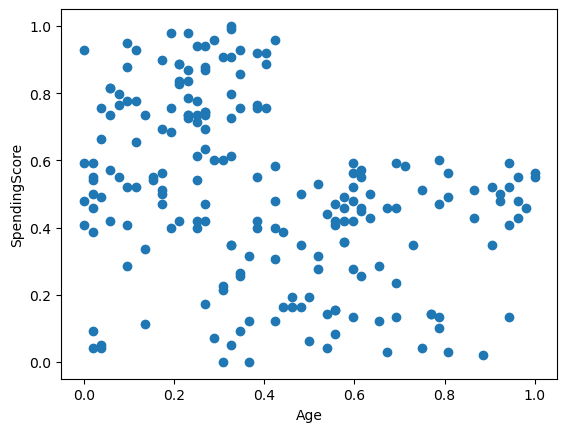

In [4]:
plt.scatter(df.Age, df['SpendingScore'])
plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.show()

In [5]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,NO.ofVisits,SpendingScore
0,1,0,0.019231,1,0.387755
1,2,0,0.057692,3,0.816327
2,3,1,0.038462,4,0.051020
3,4,1,0.096154,6,0.775510
4,5,1,0.250000,2,0.397959


In [6]:
df.describe()

,CustomerID,Gender,Age,NO.ofVisits,SpendingScore
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,0.400962,4.950000,0.502041
std,57.879185,0.497633,0.268635,2.114202,0.263505
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.750000,0.000000,0.206731,3.000000,0.344388
50%,100.500000,1.000000,0.346154,5.000000,0.500000
75%,150.250000,1.000000,0.596154,7.000000,0.734694
max,200.000000,1.000000,1.000000,9.000000,1.000000


In [7]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age', 'SpendingScore']])
df['cluster'] = y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,NO.ofVisits,SpendingScore,cluster
0,1,0,0.019231,1,0.387755,1
1,2,0,0.057692,3,0.816327,3
2,3,1,0.038462,4,0.051020,1
3,4,1,0.096154,6,0.775510,3
4,5,1,0.250000,2,0.397959,1


In [24]:
km.cluster_centers_

array([[0.23639053, 0.80423862],
       [0.52454992, 0.17542336],
       [0.14423077, 0.42103984],
       [0.7416388 , 0.48269743]])

In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','SpendingScore']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

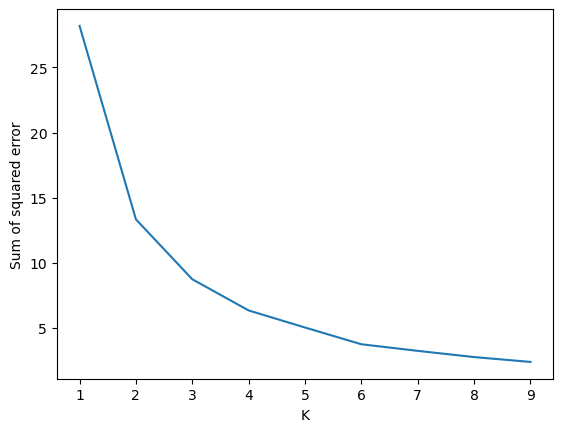

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()

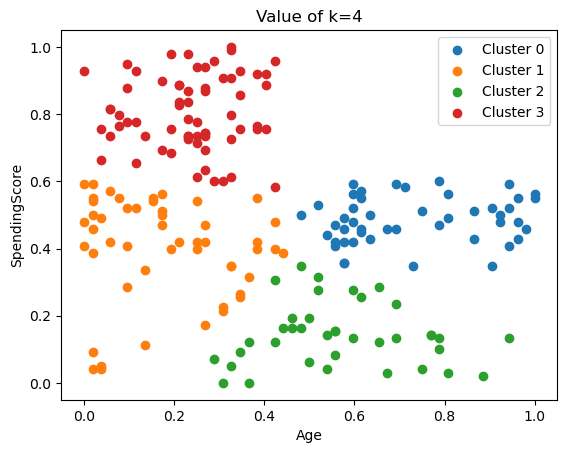

In [14]:

for i in range(4):
    cluster_data = df[df.cluster == i]
    plt.scatter(cluster_data.Age, cluster_data['SpendingScore'], label=f'Cluster {i}')
    
plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.legend()
plt.title('Value of k=4')
plt.show()

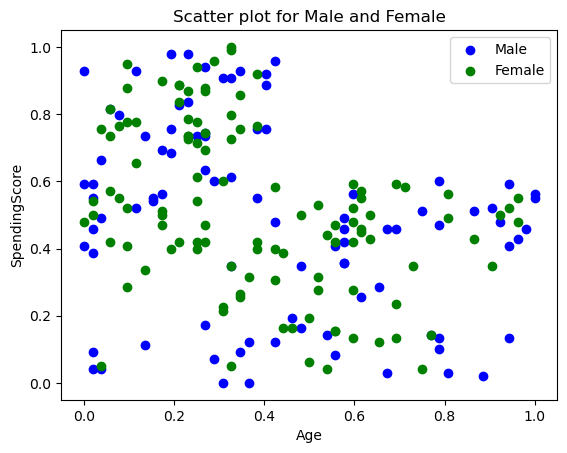

In [15]:
plt.scatter(df[df['Gender'] == 0]['Age'], df[df['Gender'] == 0]['SpendingScore'], label='Male', color='blue')
plt.scatter(df[df['Gender'] == 1]['Age'], df[df['Gender'] == 1]['SpendingScore'], label='Female', color='green')

plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.legend()
plt.title('Scatter plot for Male and Female')
plt.show()

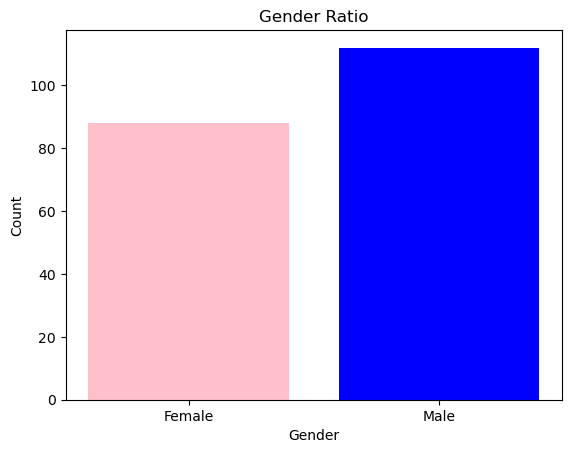

In [16]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(gender_counts.index, ['Male', 'Female'])
plt.title('Gender Ratio')
plt.show()

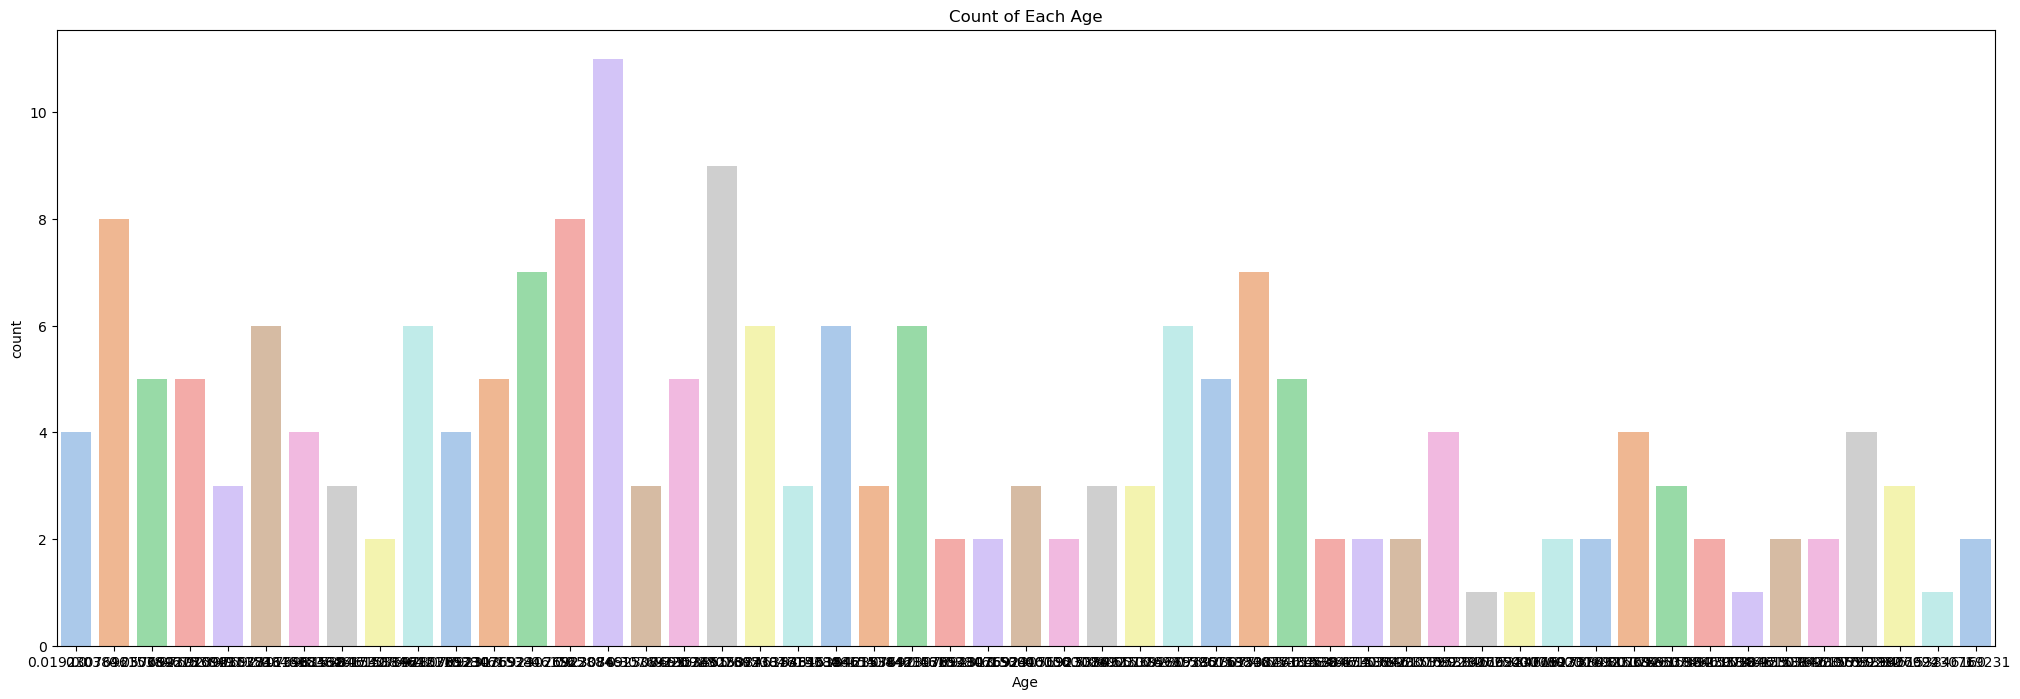

In [17]:
plt.figure(figsize=(25, 8))
sns.countplot(x="Age", data=df, palette="pastel")
plt.title('Count of Each Age')
plt.show()

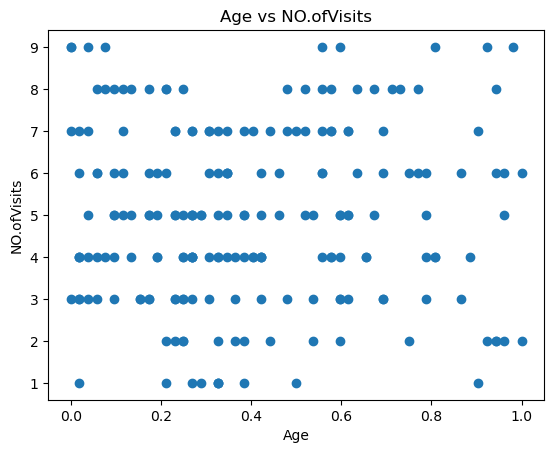

In [18]:
plt.scatter(df['Age'], df['NO.ofVisits'])
plt.xlabel('Age')
plt.ylabel('NO.ofVisits')
plt.title('Age vs NO.ofVisits')
plt.show()

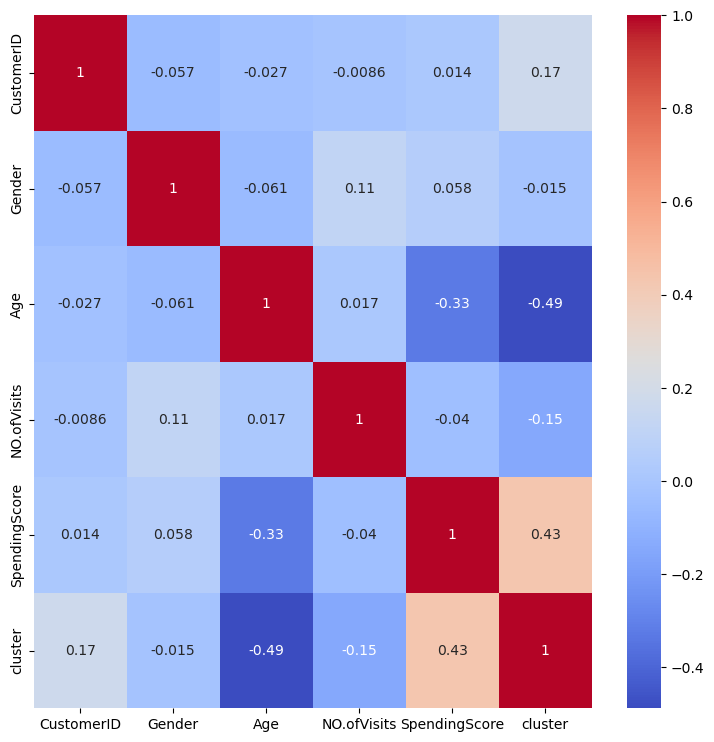

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()